In [1]:
import pandas as pd
import numpy as np
import datetime

#download data, organize into arrays

df = pd.read_csv("mly2275.csv", comment='#')
#print(df.head())

X1=df.iloc[:, 0]
X2=df.iloc[:, 1]

#making X an array of dates 
X=[]
for i in range(np.size(X1, 0)):
    X.append(datetime.date(X1[i], X2[i], 1))
X=np.array(X)

y1=df.iloc[:, 2]
y2=df.iloc[:, 3]
y3=df.iloc[:, 4]
y4=df.iloc[:, 5]
y5=df.iloc[:, 6]
y6=df.iloc[:, 7]
y7=df.iloc[:, 8] 
y8=df.iloc[:, 9]
y9=df.iloc[:, 10]
y10=df.iloc[:, 11]

print(df.dtypes) #some of our columns came out as 'object' (string) --> we'll have to fix that
#                --> where the data's missing, use average of 2 surrounding points It's not perfect, but should be sufficient

for i in range(np.size(y7, 0)):
    if y7[i]=='None':
        y7[i]=(float(y7[i-1])+float(y7[i+1]))/2
y7=y7.astype(float)
for i in range(np.size(y8, 0)):
    if y8[i]=='None':
        y8[i]=(float(y8[i-1])+float(y8[i+1]))/2
y8=y8.astype(float)
for i in range(np.size(y9, 0)):
    if y9[i]=='None':
        y9[i]=(float(y9[i-1])+float(y9[i+1]))/2
y9=y9.astype(float)
for i in range(np.size(y10, 0)):
    if y10[i]=='None':
        y10[i]=None
y10=y10.astype(float)

#we're not including hours of sun in our data, because it's missing for the past decade
y=np.column_stack((y1, y2, y3, y4, y5, y6, y7, y8, y9))

year       int64
month      int64
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
rain     float64
gmin      object
wdsp      object
maxgt     object
sun       object
dtype: object


<ipython-input-1-3c60f9e5ab95>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y7[i]=(float(y7[i-1])+float(y7[i+1]))/2
<ipython-input-1-3c60f9e5ab95>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y8[i]=(float(y8[i-1])+float(y8[i+1]))/2
<ipython-input-1-3c60f9e5ab95>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y9[i]=(float(y9[i-1])+float(y9[i+1]))/2
<ipython-input-1-3c60f9e5ab95>:47: SettingWithCopyWarning: 
A value is tryin

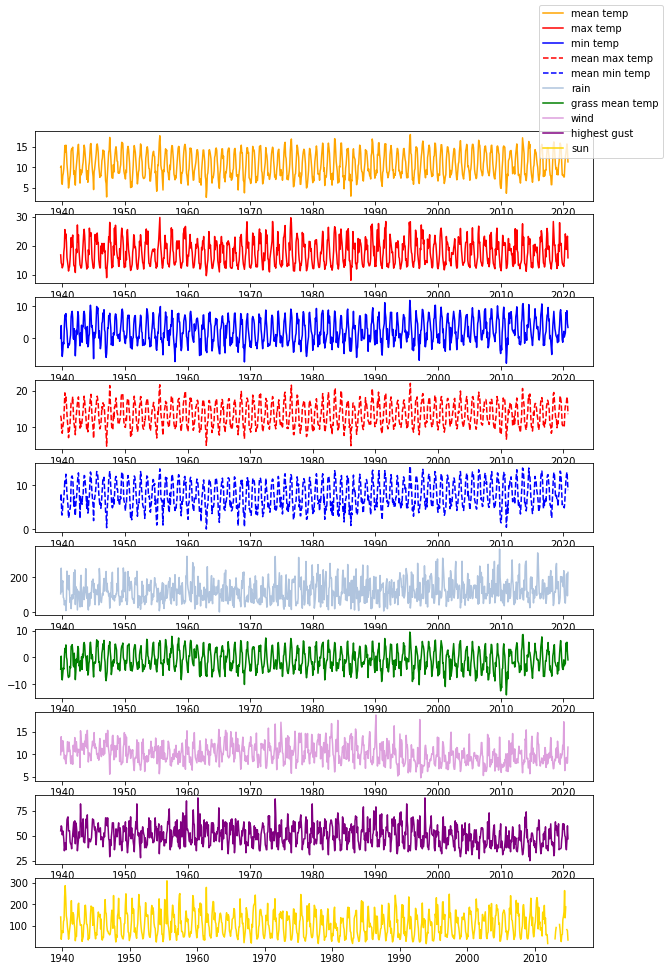

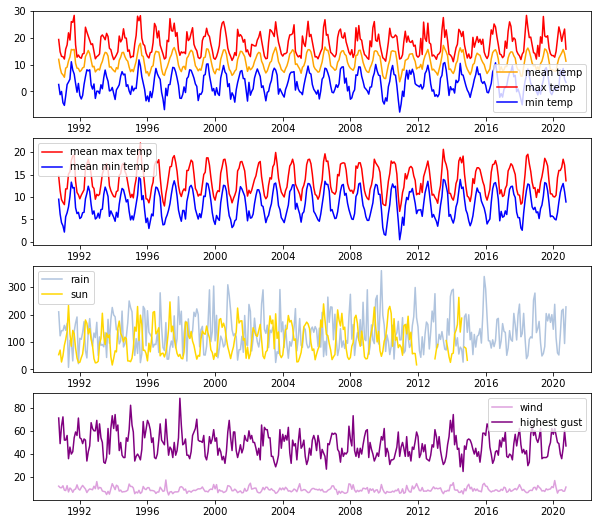

In [2]:
#visualise data

import matplotlib.pyplot as plt


#timeline - each variable on its own

f=plt.figure(figsize=(10,15))
f.add_subplot(10, 1, 1)
plt.plot(X, y1, color='orange', label='mean temp')
f.add_subplot(10, 1, 2)
plt.plot(X, y2, color='red', label='max temp')
f.add_subplot(10, 1, 3)
plt.plot(X, y3, color='blue', label='min temp')
f.add_subplot(10, 1, 4)
plt.plot(X, y4, color='red',linestyle='dashed', label='mean max temp')
f.add_subplot(10, 1, 5)
plt.plot(X, y5, color='blue',linestyle='dashed', label='mean min temp')
f.add_subplot(10, 1, 6)
plt.plot(X, y6, color='lightsteelblue', label='rain')
f.add_subplot(10, 1, 7)
plt.plot(X, y7, color='green', label='grass mean temp')
f.add_subplot(10, 1, 8)
plt.plot(X, y8, color='plum', label='wind')
f.add_subplot(10, 1, 9)
plt.plot(X, y9, color='purple', label='highest gust')
f.add_subplot(10, 1, 10)
plt.plot(X, y10, color='gold', label='sun') #note that sun data disappears around 2010 - 2015
f.legend()
plt.show()

#last 30 yrs - comparing variables that seem related --> slice [612:None]
f=plt.figure(figsize=(10,9))
f.add_subplot(4, 1, 1)
plt.plot(X[612:None], y1[612:None], color='orange', label='mean temp')
plt.plot(X[612:None], y2[612:None], color='red', label='max temp')
plt.plot(X[612:None], y3[612:None], color='blue', label='min temp')
plt.legend()
f.add_subplot(4, 1, 2)
plt.plot(X[612:None], y4[612:None], color='red', label='mean max temp')
plt.plot(X[612:None], y5[612:None], color='blue', label='mean min temp')
plt.legend()
f.add_subplot(4, 1, 3)
plt.plot(X[612:None], y6[612:None], color='lightsteelblue', label='rain')
plt.plot(X[612:None], y10[612:None], color='gold', label='sun') #note that sun data disappears around 2010 - 2015
plt.legend()
f.add_subplot(4, 1, 4)
plt.plot(X[612:None], y8[612:None], color='plum', label='wind')
plt.plot(X[612:None], y9[612:None], color='purple', label='highest gust')
plt.legend()
plt.show()

In [3]:
#prep data for model
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#transform X datetime into a numerical value for the model
X1=[]; X2=[]
for z in range(np.size(X)):
    X1.append(X[z].year)
    X2.append(X[z].month)
X1=np.array(X1);X2=np.array(X2);X3=(X1*12+X2).reshape(-1, 1)
X=np.column_stack((X1, X2, X3))
poly = PolynomialFeatures(4)
X = poly.fit_transform(X)

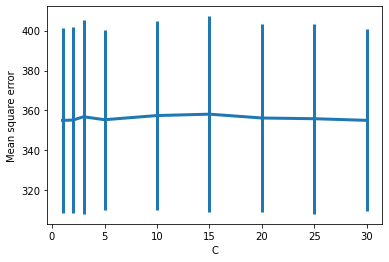

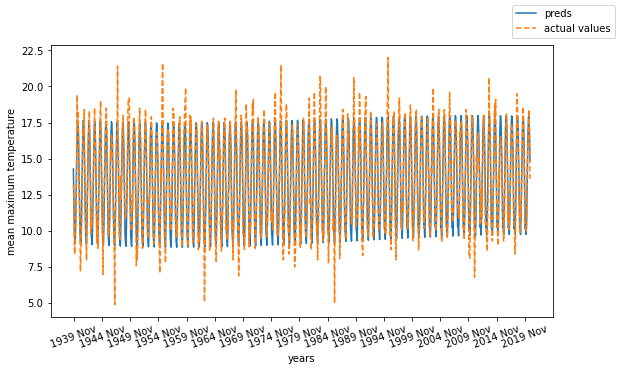

In [4]:
#Ridge Regression
#y=y[:, 0:5] #for temperature related MSE
C_range = [1,2, 3, 5, 10,15, 20, 25,30]
MSE=[]
std_error=[]
for C in C_range:
    ridge= Ridge(alpha=1/(2*C))
    kf = KFold(n_splits=5)
    temp=[]
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        ypred = ridge.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
    temp=np.array(temp)
    MSE.append(temp.mean())
    std_error.append(temp.std())
MSE=np.array(MSE)
std_error=np.array(std_error)

#best C probably around 1 
X_train, X_test, y_train, y_test = (train_test_split(X, y))
ridge= Ridge(alpha=1/(2*1))
ridge.fit(X_train, y_train)
ypred=ridge.predict(X)

import calendar
X_labels=[];X_ticks=[]
for i in range(1,np.size(X1, 0), 60):
    temp=('%s'%X1[i]+' %s'%calendar.month_abbr[X2[i]])
    X_ticks.append(int(X3[i]))
    X_labels.append(str(temp))
X_labels=np.array(X_labels);X_ticks=np.array(X_ticks)

fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.errorbar(C_range, MSE, yerr=std_error, linewidth=3)
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.show()

fig=plt.figure(figsize=(9, 5))
fig.add_subplot(1, 1, 1)
plt.plot(X[:,3], ypred[:,3], label='preds')
plt.plot(X[:,3], y[:,3], linestyle='dashed',label='actual values')
plt.xlabel('years')
plt.ylabel('mean maximum temperature')
plt.xticks(X_ticks,X_labels, rotation=20)
fig.legend()
plt.show()

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680.2007771264011, tolerance: 0.7590609884318766
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2206.4450299303935, tolerance: 1.4452349203084833
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1668.5553775201113, tolerance: 1.141928849614396
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 716.5982730533826, tolerance: 0.848597671373556
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 881.0358221831946, tolerance: 0.7434658716302953
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101357.3796664728, tolerance: 304.99531581514765
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

0.5562918112489964


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1807.736690939258, tolerance: 1.146980032133676
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 726.3581390123827, tolerance: 0.8295317480719794
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865.9555877069787, tolerance: 0.7199384678663239
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

0.5576217785225712


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799.2334535855878, tolerance: 0.7250407776349614
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1190679.0030827674, tolerance: 319.44861671079695
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2062.119699021813, tolerance: 1.268325005462725
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 827.8329851886153, tolerance: 0.7156913684210526
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106017.8677124789, tolerance: 297.01672454942235
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962.8739997617436, tolerance: 1.1862262079589216
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

0.5590479973970581


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2060.81438189655, tolerance: 1.268325005462725
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1278.3504307099438, tolerance: 0.4093594254498715
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25511.1067337429, tolerance: 8.99876503856041
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25847.78445372651, tolerance: 8.66541155327343
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.1074806021118, tolerance: 0.7590609884318766
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2200.14199666954, tolerance: 1.4452349203084833
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

0.5592374717591371


C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 726.3581390123827, tolerance: 0.8295317480719794
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865.9555877069787, tolerance: 0.7199384678663239
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166287.2939656915, tolerance: 321.36229852056556
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

0.5576217785225712


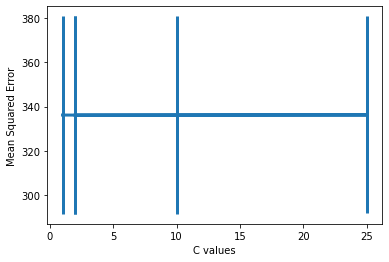

No handles with labels found to put in legend.
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.5240003903558, tolerance: 0.7590609884318766
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2194.887168255196, tolerance: 1.4452349203084833
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1654.7907721377517, tolerance: 1.141928849614396
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1220.0617708754457, tolerance: 0.37897755327342747
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24168.016996818133, tolerance: 8.409254685494224
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686.5616886215251, tolerance: 0.7660565288831837
  model = cd_fast.enet_coordinate_descent(
C:\Users\maxri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

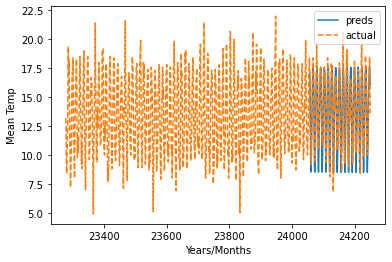

In [6]:
#Lasso regression
from sklearn.linear_model import Lasso
C = [1, 2, 10, 25, 2]
m =[]
s = []
for c in C:
    lasso = Lasso(alpha=1/c)
    k = KFold(n_splits=5)
    t = []
    for tr, te in kf.split(X):
        lasso.fit(X[tr], y[tr])   
        yp = lasso.predict(X[te])
        t.append(mean_squared_error(y[te], yp))
    t = np.array(t)
    m.append(t.mean())
    s.append(t.std())
    print(lasso.score(X[te], y[te]))
plt.errorbar(C, m, yerr=s, linewidth=3)
plt.xlabel('C values')
plt.ylabel('Mean Squared Error')
plt.show()
#plt.plot(X[te][:,3], yp[:,1], label='preds')
#plt.plot(X[te][:,3], y[te][:,1], label='actual values')
plt.legend()

#Lasso Cross-Validated
k = KFold(n_splits=5)
lasso = Lasso(alpha=1/25)
for tr, te in kf.split(X):
    lasso.fit(X[tr], y[tr])   
    yp = lasso.predict(X[te])
#fig=plt.figure(figsize=(8, 5))
#fig.add_subplot(1, 1, 1)
plt.xlabel('Years/Months')
plt.ylabel('Mean Temp')
plt.plot(X[te][:,3], yp[:,3], label='preds')
plt.plot(X[:,3], y[:,3], linestyle='dashed', label='actual')
plt.legend(loc='upper right')
plt.show()

    

   
    

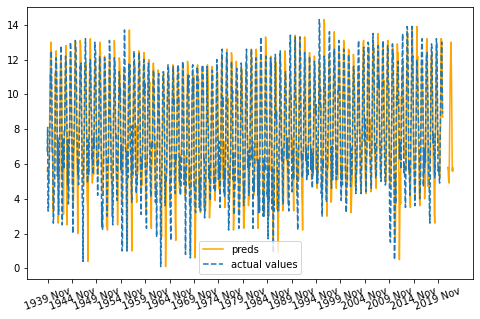

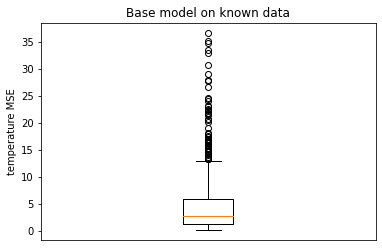

In [7]:
#baseline model - just predict the preceding year
X=np.column_stack((X1, X2, X3))
def baseline(X, y, W): #known inputs array, known outputs array, inputs we Want predictions for 
    preds=[]
    for i in range(np.size(W, 0)):
        temp=[None, None, None, None, None, None, None, None, None]
        for j in range(np.size(X, 0)):
            if((W[i,2]-X[-1,2])>12): #if last known info more than a year ago, just use that last year available
                month_of_last_year=int(((W[i,2]-X[-1,2])%12)-12)
                temp=((y[month_of_last_year, :]))
                break
            elif(W[i,2]-12==(X[j,2]-12)): #compare the X3s - is there info from a year before?
                temp=y[j-12]
                break
        preds.append((temp))
    preds=np.array(preds)
    return preds

#tiny future set
W1=[2020, 2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022,
   2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022]
W1=np.array(W1)
W2=[6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];W2=np.array(W2)
W3=W1*12+W2
W=np.column_stack((W1, W2, W3))

preds=baseline(X, y, W)
predsX=baseline(X, y, X)
plt.figure(figsize=(8,5))
plt.plot(W[:,2], preds[:,4],color='orange', label='preds')
plt.plot(X[:,2], predsX[:,4],color='orange')
plt.plot(X[:,2], y[:,4], linestyle='dashed',label='actual values')
plt.xticks(X_ticks,X_labels, rotation=20)
plt.legend()
plt.show()

MSE=[]
for i in range(np.size(y[:,0],0)):
    MSE.append((mean_squared_error(y[i, 0:5],predsX[i, 0:5])))
MSE=np.array(MSE)
plt.figure()
plt.boxplot(MSE)
plt.xticks([])
plt.title('Base model on known data')
plt.ylabel('temperature MSE')
plt.show()

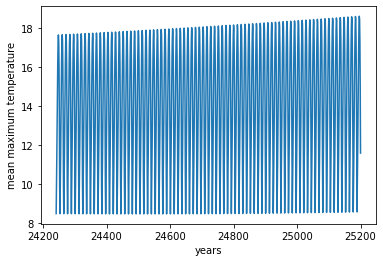

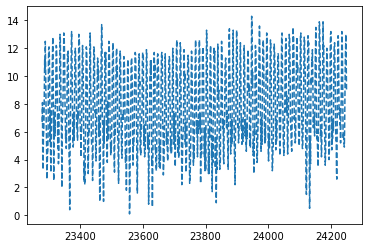

In [9]:
#testing our models on a larger future dataset 
Xf1=[];Xf2=[]
for i in range(80):
    for j in range(1,13):
        Xf1.append(2020+i)
        Xf2.append(j)
Xf1=np.array(Xf1);Xf2=np.array(Xf2);Xf3=Xf1*12+Xf2
Xf3=np.array(Xf3)
Xf=np.column_stack((Xf1, Xf2, Xf3))

#since lasso seems best, just implement that
poly = PolynomialFeatures(4)
Xfp = poly.fit_transform(Xf)
yf = lasso.predict(Xfp)
plt.plot(Xf[:,2], yf[:,3], label='predicted future temps')
plt.xlabel('years')
plt.ylabel('mean maximum temperature')
fig.legend('top right')
plt.show()
plt.plot(X[:,2], y[:,4], linestyle='dashed', label='actual')


 